# Unviversidad de Costa Rica.
## Facultad de Ciencias
## Escuela de Física

### Yefry López Núñez

### Plantilla para Cálculo de Incertidumbres usando Monte Carlo.

In [6]:
!pip install uncertainties #Paquete para Cálculo de Incertidumbres por propagación de Incertidumbres
!pip install mcerp #Paquete para Cálculo de Incertidumbres usando Monte Carlo

  Created wheel for uncertainties: filename=uncertainties-3.1.2-cp37-none-any.whl size=96464 sha256=60c0fe91cda58af799b416faa042081ebc187a0b87554e6dde6c2d46d2d05f66
  Stored in directory: C:\Users\DELL USER\AppData\Local\pip\Cache\wheels\d9\d3\0e\5b0b743a8abd50373705427438456da5dc2621891138d7a618
Successfully built uncertainties
  Created wheel for mcerp: filename=mcerp-0.12-cp37-none-any.whl size=22818 sha256=be149087d7427ccb184ac65fa2bb74a37efdeb1c4c8d753489344592264b8631
  Stored in directory: C:\Users\DELL USER\AppData\Local\pip\Cache\wheels\38\0d\16\e880919316949ca1e046bbefd1fe18a1e6e9dce9c82bbd0145
Successfully built mcerp


In [295]:
#Importación de Paquetes Básicos
import numpy as np #Para manejar arrays
import matplotlib.pyplot as plt #para graficar
import math   #Módulo básico de matemática


In [4]:
#Importación de Paquete de Propagación Incertidumbre
from uncertainties import ufloat
from uncertainties.umath import *

#### Caso I. Cálculo de la incertidumbre Eficiencia de pila de combustible. 
##### Tomado de   W.  K.  Chan,Theory  and  Applications  of  Monte  CarloSimulations(Intechopen, 2013)

Las celdas de combustible son dispositivos electroquímicos que producen energía eléctrica utilizando gas hidrógeno como combustible. 
La producción de energía es una consecuencia de la reacción química de un protón con gas oxígeno que produce agua como salida. 
También existe la generación de calor como un subproducto que podría usarse en procesos de energía de cogeneración que mejoren la eficiencia energética general.

Uno de los parámetros más importantes para ser controlado y medido en una celda de combustible es su eficiencia energética. Para hacerlo, es necesario conocer tanto la energía producida por la célula como la energía generada por la reacción química. 
La eficiencia termodinámica de una pila de combustible puede calcularse mediante 

$$\eta = \frac{\Delta G}{\Delta H}$$

La eficiencia real se encuetra dada por

$$\eta_{R} = \frac{\Delta G}{\Delta H}*\frac{E_{R}}{E_{I}}$$

Donde $\Delta$ G es la energía libre de Gibbs, $\Delta$ H la entalpía, $E_{R}$ el voltaje real aplicado y $E_{I}$ el voltaje ideal$ 

Suponga que en el laboratorio se midieron las cantidades físicas mencionadas anteriormenre.

* $\Delta$ G = 237.1 kJ/mol con una incertidumbre de 0.1 kJ/mol
* $\Delta$ H = 285.8 kJ/mol con una incertidumbre de 0.1 kJ/mol
*  Voltaje ideal de 1.229 V obtenido a partir de la Ecuación de Nerts. Suponga que se tiene una incertidumbre de $\pm 0.001$
* Voltaje real de  0.732 $\pm 0.001$ 


Suponga que no hay correlación.
Cálcule la incertidumbre de la eficiencia.

A continuación un diagrama causa-efecto 

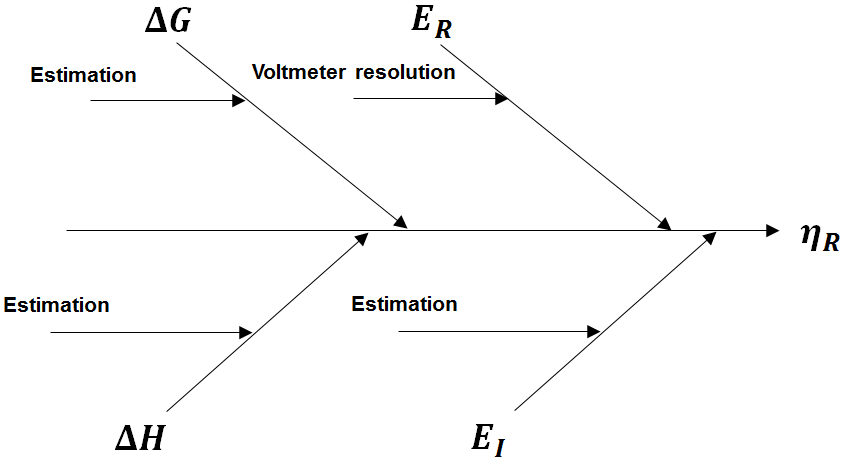

##### Simulación Vía Monte Carlo

#### Algoritmo

###### Paso 1. Definda el mensurando y las variables de entrada.

Para este caso el mensurando es la eficiencia de la celda $\eta_{R}$

Las variables de entrada (mediciones) están dadas por

* $\Delta$ G es la energía libre de Gibbs,
* $\Delta$ H la entalpía, 
* $E_{R}$ el voltaje real aplicado y 
* $E_{I}$ el voltaje ideal


###### Paso 2. Definición del Funcional.

$$\eta_{R} = \frac{\Delta G}{\Delta H}*\frac{E_{R}}{E_{I}}$$

###### Paso 3. Estimación de las distrbuciones de densidad de probabilidad de las variables de entrada.

Nótese que la información respecto a las incertidumbres para las 5 variables es bastante pobre o provienden de mediciones de intrumentos. Por tanto asuma que se comportan como una distribución rectangular.

###### Ejemplo  Energía de Gibbs
Valor Máximo = 237.1 + 0.1

In [326]:
237.1+0.1

237.2

Valor Mínimo = 237.1 - 0.1

In [327]:
237.1 - 0.1

237.0

|         Entrada         | Type |   PDF   |            PDF parametros            |
|:----------------------------:|:----:|:-------:|:------------------------------------:|
|   Energía Libre (ΔG)   |   B  | Uniforme | Min: 237.0 kJ/mol; Max: 237.2 kJ/mol |
| Enthalpía (ΔHΔH) |   B  | Uniforme | Min: 285.7 kJ/mol; Max: 285.9 kJ/mol |
|     Voltaje Ideal      |   B  | Uniforme |      Min 1.228 ; Max 1.230      |
|      Voltaje Real      |   A  | Gaussiana |     Media: 0.732 V; std = 0.001      |

Número de Intentos recomendados para 95% de confianza

$$M = \frac{10^{4}}{1-p} $$

$$M = 2x10^{5}$$

###### Paso 4. Simulación

In [328]:
delta_G = 237.1
delta_H = 285.8
E_I = 1.229
E_R = 0.732

Eficiencia = (delta_G/delta_H)*(E_R/E_I)
print(Eficiencia)

0.49411555703345944


###### Simulación para delta G

In [5]:
deltaG = np.random.uniform(237.0,237.2,2*10**5)

###### Simulación para delta H

In [6]:
deltaH = np.random.uniform(285.7,285.9,2*10**5)

###### Simulación para Voltaje Real

In [7]:
VR = np.random.uniform(0.7315,0.7325,2*10**5)

###### Simulación para Voltaje Ideal

In [8]:
VI = np.random.uniform( 1.228 ,1.230,2*10**5)

In [9]:
print(deltaG)

[237.09234176 237.01236468 237.01264645 ... 237.06997956 237.05995168
 237.15513281]


In [10]:
Eficiencia = (deltaG/deltaH)*(VR/VI)

C:\Users\DELL USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


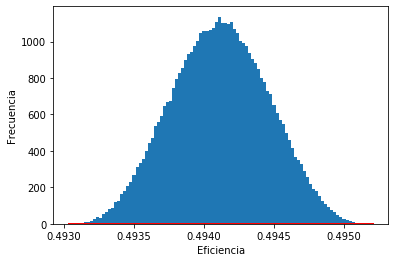

In [11]:
count, bins, ignored = plt.hist(Eficiencia, 100, normed=True)
plt.ylabel('Frecuencia')
plt.xlabel('Eficiencia')
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

###### Paso 5. Resultados

In [12]:

Media_eficiencia = np.mean(Eficiencia)
print(Media_eficiencia)

0.49411631229532366


In [13]:
Desviación_standar = np.std(Eficiencia)
print(Desviación_standar)

0.0003414283891754875


In [14]:
minimo = np.min(Eficiencia)
print(minimo)

maximo = np.max(Eficiencia)
print(maximo)

0.4930345463648666
0.49520626252240457


|       Parámetro       |  Valor  |
|:---------------------:|:-------:|
|          Media       | 0.49412 |
|   Desviación Estándar  | 0.00044 |
|  Límite izquierdo para 95% | 0.49307 |
| Límite Derecho para 95% | 0.49518 |

###### Simulacion programada Monte Carlo (Resumida)

In [263]:
trials = 2*10**5
lista = []
for i in range(trials):
    deltaG = np.random.uniform(237.0,237.2)
    deltaH = np.random.uniform(285.7,285.9)
    VR = np.random.normal(0.732,0.001/2)
    VI = np.random.uniform( 1.228 ,1.230)
    Eficiencia = (deltaG/deltaH)*(VR/VI)
    lista.append(Eficiencia)
    
Eficiencia = np.array(lista)

In [264]:
Media = np.mean(Eficiencia)
Desviacion_sdt = np.std(Eficiencia)
min_value= np.min(Eficiencia)
max_value= np.max(Eficiencia)

In [265]:
print("Valor de la Eficiencia",Media)
print("Valor de la Desviación estándar",Desviacion_sdt)
print("Valor mínimo",min_value)
print("Valor mínimo",max_value)

Valor de la Eficiencia 0.4941147372710199
Valor de la Desviación estándar 0.0004394262986774996
Valor mínimo 0.49222100634827315
Valor mínimo 0.49598261754323386


#### Comparativa con Propagación de Incertidumbres

Paso 1. Cada incertidumbre se divide por raiz de 3 por ser rectangular

In [262]:
u_H = 0.1/ math.sqrt(3)
u_G =  0.1/ math.sqrt(3)
u_VI = 0.001 / math.sqrt(3)
u_VR = 0.001 / 2

Paso 2. Simulacion

In [256]:
delta_G = 237.1
delta_H = 285.8
E_I = 1.229
E_R = 0.732

Eficiencia = (delta_G/delta_H)*(E_R/E_I)
print(Eficiencia)

0.49411555703345944


Paso 3. Incertidumbre


Se utilizar ufloat(valor medido, incertidumbre).
Cada variable se declara y posteriormente se realiza el cálculo.

El paquete Uncertaintly realizar toda la propagación de incertidumbres y cálculo


In [333]:
!pip install uncertainties
#Importación de Paquete de Propagación Incertidumbre
from uncertainties import ufloat
from uncertainties.umath import *

u_H = 0.1/ math.sqrt(3) #Incertidumbre Energía Libre Gibbs
u_G =  0.1/ math.sqrt(3) #Incertidumbre Entalpia
u_VI = 0.001 / math.sqrt(3) #Incertidumbre Potencial Ideal
u_VR = 0.001 / 2 #Incertidumbre Potencial Real

Delta_G = ufloat(237.1,u_H)
Delta_H = ufloat(285.8,u_G)
E_I = ufloat(1.229,u_VI)
E_R = ufloat(0.732,u_VR)

Eficienciaf= (Delta_G/Delta_H)*(E_R/E_I)
print(Eficienciaf)

0.4941+/-0.0004


La incertidumbre según propagación de incertidumbres sería
$$0.4941 \pm 0.0004$$

| Método | Resultado | Incertidumbre Estándar Expandida (95% de confianza) |
|:------:|:---------:|:---------------------------------------------------:|
|   GUM  |   0.4941  |                        0.0008                       |
|   MC   |   0.4941  |                        0.0008                       |

#### Caso II. Cálculo de la incertidumbre en la preparación de un patrón de Cadmio. 
##### Tomado de   W.  K.  Chan,Theory  and  Applications  of  Monte  CarloSimulations(Intechopen, 2013)
##### Tomado de la Guía Eurachem 

Se desea preparar una solución estándar de cadmio para análisis de laboratorio.
En el laboratorio se peso 0.10028 g de cadmio pureza  $99.99\%$.
(El fabricante de la balanza reporta una incertidumbre de 0.05 mg).
La masa se transvasa cuantitaivamente a un balón aforado de 100 mL.

Las mediciones se realizaron a 20 grados Celsius.

Determina la concentración en mg/L de la disolución preparada y su incertidumbre. Ignore los efectos de diltación.

###### Paso 1. Definda el mensurando y las variables de entrada.

Para este caso el mensurando es concentración de cadmio en el balón de 100 mL

Las variables de entrada (mediciones) están dadas por

* masa de cadmio
* pureza
* volumen

###### Paso 2. Defina el funcional que relaciona variables de entrada con la variable de salida.

Se sabe que

$$Concentración (g/L) = \frac{masa}{volumen} $$

Pero la masa real del analito en el frasco debe considerar su pureza

$$Concentración (mg/L) = \frac{masa*pureza*1000}{volumen} $$

##### Paso 3. Determinar la función de densidad de probabilidad para laa variables de entrada

Para esto , se requiere.

* Asignar que tipo de distribución siguen las variables de entrada.
* Indicar las componentes individuales de cada variable de entrada.
* Incertidumbre.
* Cálcular los límites superior e inferior.

* Masa. El fabricante reporte incerdiumbre de $\pm 0.05 mg$. Asuma que se comporta Gaussiana
* Pureza. El frasco dice que la pureza es de 0.9999. La purezas se tratan como si fuesen de distribución uniforme
* Volumen. Para todo frasco volumetríco, considerére que su incertidumbre viene dada por la contribución de la tolerencia del mismo (triangular), repetibilidad. Tolerancia 0.05 mL, repetibilidad 0.01 mL

In [310]:
masaMC= 100.28
Pureza = 0.9999
Volumen = 0.1

ConcetracionA = masa*Pureza/Volumen
print(ConcetracionA)

1002.7+/-0.5


In [311]:
u_masaMC = 0.05
u_pureza = 0.0001

###### Masa 

In [268]:
masa = 100.28
u_masa = 0.005

###### Pureza

In [329]:
pureza_sup= Pureza + u_pureza
pureza_inf = Pureza - u_pureza

5.7735026918962585e-05


###### Volumen

$$u_volumen = \sqrt{\left(\frac{tolerancia}{\sqrt{6}}\right)^{2}+ \left(repetibilidad\right)^{2} }$$

In [206]:
u_V = math.sqrt((0.05/math.sqrt(6))**2+(0.01)**2)
print(u_V)

0.022730302828309762


In [321]:
trials = 2*10**5
lista = []
for i in range(trials):
    m = np.random.normal(masaMC,u_masaMC)
    P = np.random.uniform(pureza_inf,pureza_sup)
    V = np.random.normal(100.00,0.02)
    C = m*P/V
    lista.append(C)

Concentracion = np.array(lista)

In [322]:
print("Media de la concentracion:", np.mean(Concentracion))
print("Desviacion estandar:",np.std(Concentracion))

Media de la concentracion: 1.0026997086341654
Desviacion estandar: 0.0005423099899315699


###### Propagación de Incertidumbres

In [330]:
u_P = u_pureza/math.sqrt(3) #estandarización para propagación de incertidumbres
u_V = math.sqrt((0.05/math.sqrt(6))**2+(0.01)**2) #incertidumbre estándar asociada a volumen
print(u_V)

0.022730302828309762


In [315]:
masa = ufloat(100.28,0.05)
Pureza = ufloat(0.9999,0.00006)
Volumen = ufloat(100,0.02)

In [316]:
concentracion = masa*Pureza/Volumen
print(concentracion)

1.0027+/-0.0005


(1003 $\pm$ 1) mg/L

#### Caso III. Cálculo de Terstosterona libre Sartorius et al

Modelo

$$cFT=K_{1}*\left(\frac{T}{log_{10}S}\right)-K_{2}*T^{2}$$

Donde T representa la Testosterona sérica, S el suero SHBG y $K_{1}$ y $K_{2}$ representan dos parámetros empíricos.

Considere que en el laboratorio se obtuvieron los siguientes resultados

| Term in Sartorius cFT equation | Quantity | Standard uncertainty (u) |  Unit  |
|:------------------------------:|:--------:|:------------------------:|:------:|
|     Serum testosterone (T)     |   12.2   |        5% (= 0.61)       | nmol/L |
|         Serum SHBG (S)         |   36.6   |        5% (= 1.83)       | nmol/L |
|        $K_{1}$ 24.00314        | 24.00314 |     1% (= 0.2400314)     |        |
|         $K_{2}$ 0.04599        |  0.04599 |     1% (= 0.0004599)     |        |

Cálculando la incertidumbre

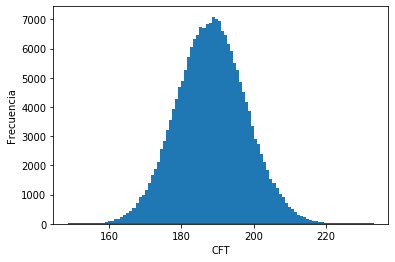

In [331]:
Trials = 2*10**5
lista = []
for i in range(Trials):
    T= np.random.normal(12.2,0.61)
    S= np.random.normal(36.6,1.83)
    K1= np.random.normal(25.00314,0.240314)
    K2= np.random.normal(0.04599,0.0004599)
    CFT = (K1*T/np.log10(S))-K2*np.power(T,2)
    lista.append(CFT)
CFT = np.array(lista)    

count, bins, ignored = plt.hist(CFT, 100)
plt.ylabel('Frecuencia')
plt.xlabel('CFT')
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [245]:
print("Media",np.mean(CFT))
print("s",np.std(CFT))

Media 188.3419410287357
s 9.655734594221316


###### Propagación de Incertidumbres

In [249]:
T = ufloat(12.2,0.61)
S = ufloat(36.6,1.83)
K1 = ufloat(25.00314,0.240314)
K2 = ufloat (0.04599,0.0004599)

CFT = (K1*T/log10(S))-K2*(T**2)

print(CFT)

188+/-10


### Expresión General cálculo de incertidumbres por método sistemático de propagación

$$u_{y}^{2} =\sum_{i=1}^{N}  \left(\frac{\partial f}{\partial x_{i}}\right) ^{2} u_{x_{1}}^{2}  +  2 \sum_{i=1}^{N-1} \sum_{j=i+1}^{N}  \left(\frac{\partial f}{\partial x_{i}}\right) \left(\frac{\partial f}{\partial x_{j}}\right)cov(x_{i},x_{j}) $$
